<a href="https://colab.research.google.com/github/mrifkifauzi/KMeans/blob/main/KMeans_Countries_for_HELP_International.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# **1. Reading & Understanding Data**

In [ ]:
data = pd.read_csv('Data_Negara_HELP.csv')
data.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.shape

(167, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
data.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# **2. Exploratory Data Analysis**

2a. **Univariate** Analysis

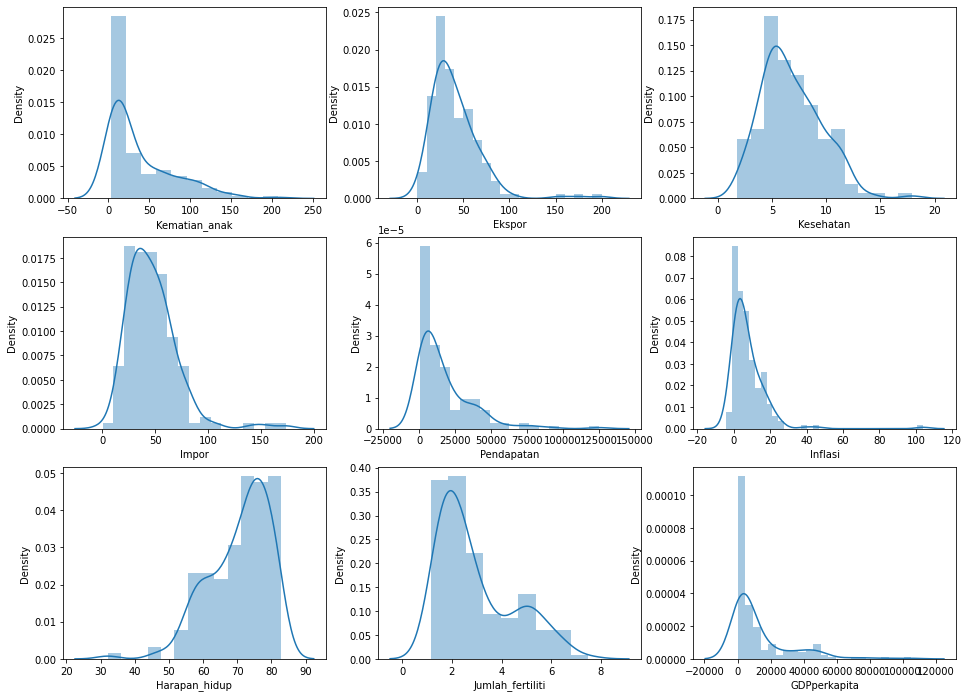

In [ ]:
plt.figure(figsize=(16,12))

for i in enumerate(data.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(data[i[1]])
plt.show()

2b. **Bivariate** Analysis

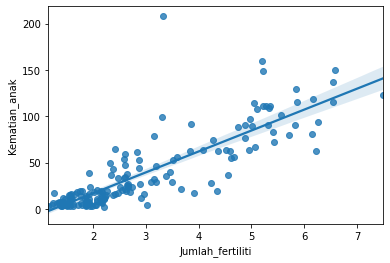

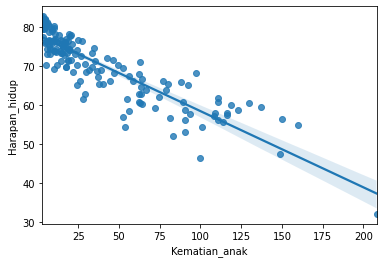

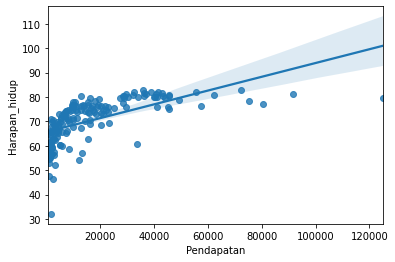

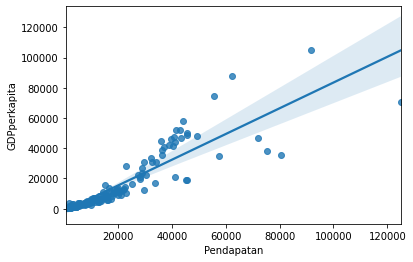

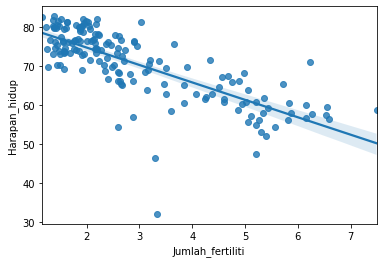

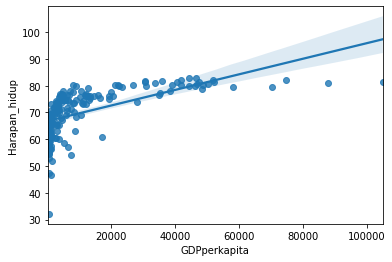

In [ ]:
sns.regplot(x='Jumlah_fertiliti', y='Kematian_anak', data=data)
plt.show()
sns.regplot(x='Kematian_anak', y='Harapan_hidup', data=data)
plt.show()
sns.regplot(x='Pendapatan', y='Harapan_hidup', data=data)
plt.show()
sns.regplot(x='Pendapatan', y='GDPperkapita', data=data)
plt.show()
sns.regplot(x='Jumlah_fertiliti', y='Harapan_hidup', data=data)
plt.show()
sns.regplot(x='GDPperkapita', y='Harapan_hidup', data=data)
plt.show()

#scatterplot, displot, lineplot, regplot, relplot

2c. **Multivariate** Analysis

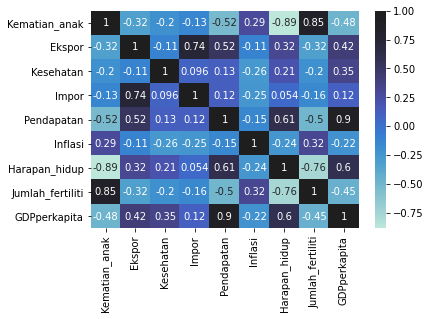

In [ ]:
sns.heatmap(data.corr(), center=1, annot=True, fmt='.2g');

based on the heatmap above:

Positive Correlation:
1. Child mortality VS Total fertility (p=0.85)
2. Income VS Life expectancy (p=0.61)
3. Income VS GDP per capita (p=0.9)
4. GDP per capita VS Life Expectancy (p=0.6)

Negative Correlation:
1. Child mortality VS life expectancy (p= -0.89)
2. Total fertility VS Life Expectancy (p= -0.76)

# 3. **Outlier** Treatment

**3a. Before Handling Outlier**

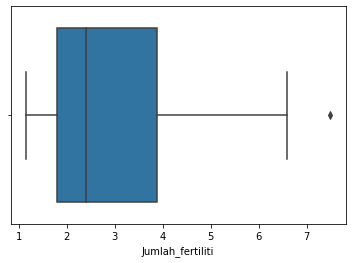

In [ ]:
sns.boxplot('Jumlah_fertiliti', data=data);

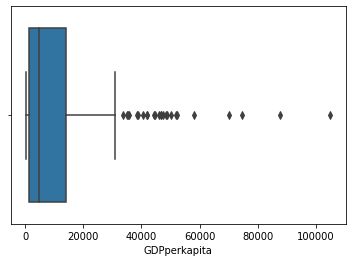

In [ ]:
sns.boxplot('GDPperkapita', data=data);

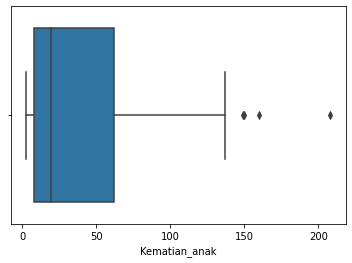

In [ ]:
sns.boxplot('Kematian_anak', data=data);

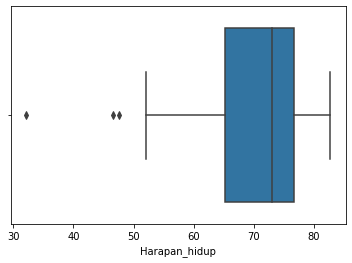

In [ ]:
sns.boxplot('Harapan_hidup', data=data);

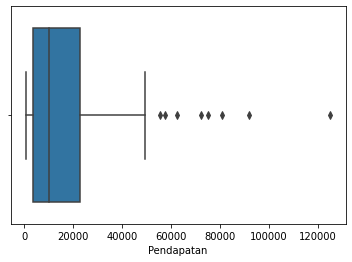

In [ ]:
sns.boxplot('Pendapatan', data=data);

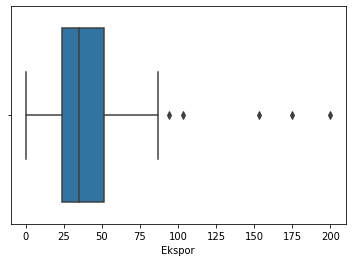

In [ ]:
sns.boxplot('Ekspor', data=data);

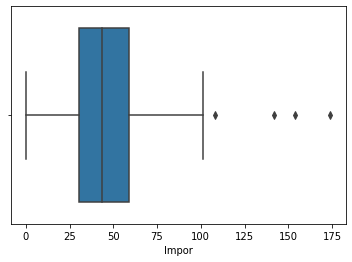

In [ ]:
sns.boxplot('Impor', data=data);

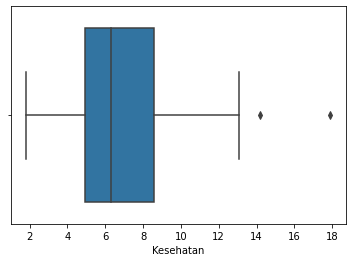

In [ ]:
sns.boxplot('Kesehatan', data=data);

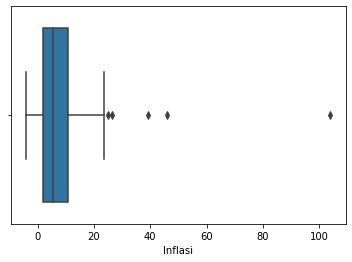

In [ ]:
sns.boxplot('Inflasi', data=data);

**3b. Handling Outlier**

In [ ]:
#Handling outlier (dengan menggantinya menggunakan nilai batas bawah dan batas atas masing-masing)

def lower_outlier(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    df_final = np.where(df<lower_bound, lower_bound, df)
    return df_final

data_lower_hanled1 = lower_outlier(data[['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']])
data_lower_hanled2 = pd.DataFrame(data_lower_hanled1, columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])

def upper_outlier(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3+1.5*IQR
    df_final = np.where(df>upper_bound, upper_bound, df)
    return df_final

data_upper_hanled = upper_outlier(data_lower_hanled2)
data_outlier_hanled = pd.DataFrame(data_upper_hanled, columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
data_outlier_hanled

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


**3c. After Handling Outlier**

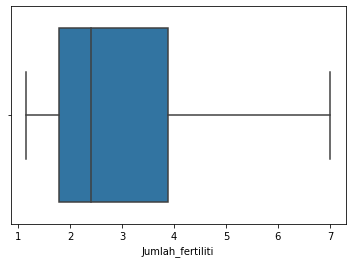

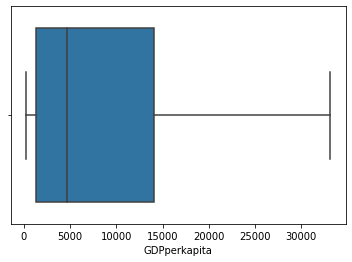

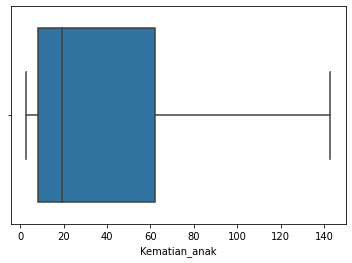

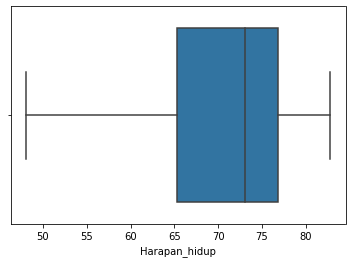

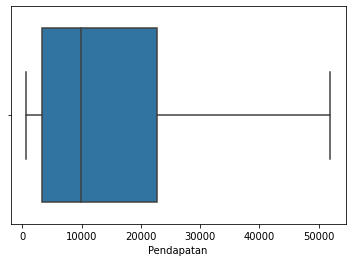

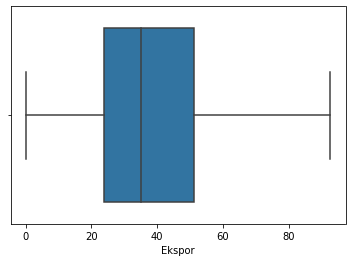

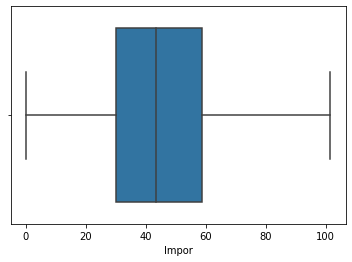

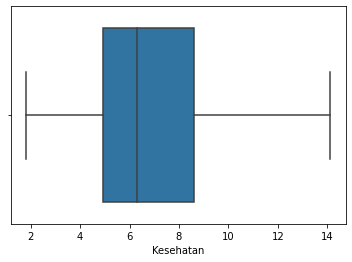

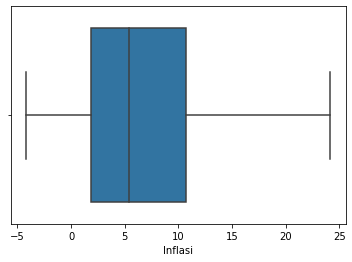

In [ ]:
sns.boxplot('Jumlah_fertiliti', data=data_outlier_hanled);
plt.show()
sns.boxplot('GDPperkapita', data=data_outlier_hanled);
plt.show()
sns.boxplot('Kematian_anak', data=data_outlier_hanled);
plt.show()
sns.boxplot('Harapan_hidup', data=data_outlier_hanled);
plt.show()
sns.boxplot('Pendapatan', data=data_outlier_hanled);
plt.show()
sns.boxplot('Ekspor', data=data_outlier_hanled);
plt.show()
sns.boxplot('Impor', data=data_outlier_hanled);
plt.show()
sns.boxplot('Kesehatan', data=data_outlier_hanled);
plt.show()
sns.boxplot('Inflasi', data=data_outlier_hanled);
plt.show()

# **4. Scaling Data**

In [ ]:
data_negara = data[['Negara']]

sc = StandardScaler()
df_std = sc.fit_transform(data_outlier_hanled)
df_std

array([[ 1.36980194, -1.39110684,  0.29601312, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.54354731, -0.09119005, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.05384625, -0.98589252, ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738,  1.52826487,  0.01782832, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.44937403, -0.60620786, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.11976755, -0.33930082, ..., -2.19651829,
         1.63547189, -0.7679976 ]])

# **5. Clustering**

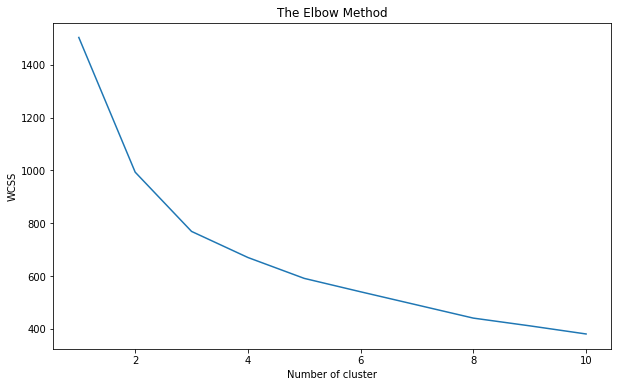

In [ ]:
#Elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

k=3 is the best k

5a. Clustering berdasarkan **Jumlah Fertiliti VS Kematian Anak**



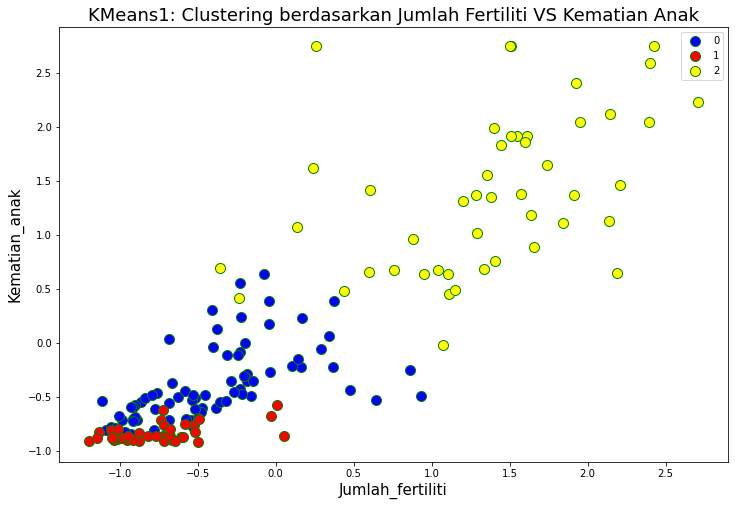

In [ ]:
data_clustering = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])

kmeans1 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
data_clustering['label1_kmeans'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(data_clustering['Jumlah_fertiliti'][data_clustering.label1_kmeans==0], data_clustering['Kematian_anak'][data_clustering.label1_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(data_clustering['Jumlah_fertiliti'][data_clustering.label1_kmeans==1], data_clustering['Kematian_anak'][data_clustering.label1_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(data_clustering['Jumlah_fertiliti'][data_clustering.label1_kmeans==2], data_clustering['Kematian_anak'][data_clustering.label1_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
#plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.title('KMeans1: Clustering berdasarkan Jumlah Fertiliti VS Kematian Anak', size=18)
plt.xlabel('Jumlah_fertiliti', size=15)
plt.ylabel('Kematian_anak', size=15)
plt.show()

5b. Clustering berdasarkan **Kematian Anak VS Harapan Hidup**

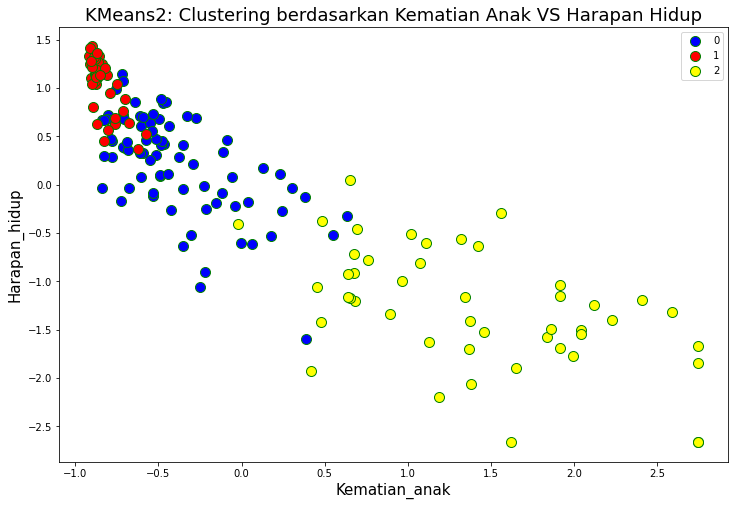

In [ ]:
kmeans2 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels2 = kmeans2.labels_
data_clustering['label2_kmeans'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(data_clustering['Kematian_anak'][data_clustering.label2_kmeans==0], data_clustering['Harapan_hidup'][data_clustering.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(data_clustering['Kematian_anak'][data_clustering.label2_kmeans==1], data_clustering['Harapan_hidup'][data_clustering.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(data_clustering['Kematian_anak'][data_clustering.label2_kmeans==2], data_clustering['Harapan_hidup'][data_clustering.label2_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
#plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.title('KMeans2: Clustering berdasarkan Kematian Anak VS Harapan Hidup', size=18)
plt.xlabel('Kematian_anak', size= 15)
plt.ylabel('Harapan_hidup', size= 15)
plt.show()

5c. Clustering berdasarkan **Pendapatan VS Harapan Hidup**

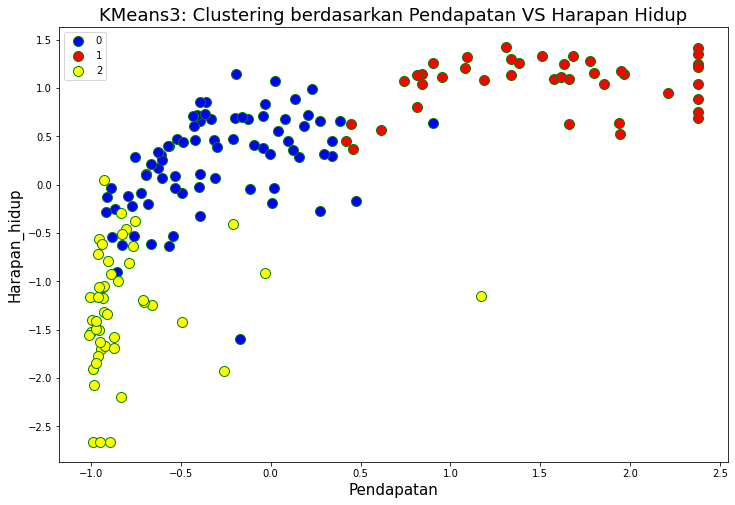

In [ ]:
kmeans3 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels3 = kmeans3.labels_
data_clustering['label3_kmeans'] = labels3

plt.figure(figsize=(12,8))
plt.scatter(data_clustering['Pendapatan'][data_clustering.label3_kmeans==0], data_clustering['Harapan_hidup'][data_clustering.label3_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(data_clustering['Pendapatan'][data_clustering.label3_kmeans==1], data_clustering['Harapan_hidup'][data_clustering.label3_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(data_clustering['Pendapatan'][data_clustering.label3_kmeans==2], data_clustering['Harapan_hidup'][data_clustering.label3_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
#plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.title('KMeans3: Clustering berdasarkan Pendapatan VS Harapan Hidup', size= 18)
plt.xlabel('Pendapatan', size= 15)
plt.ylabel('Harapan_hidup', size= 15)
plt.show()

5d. Clustering berdasarkan **Pendapatan VS GDPperkapita**

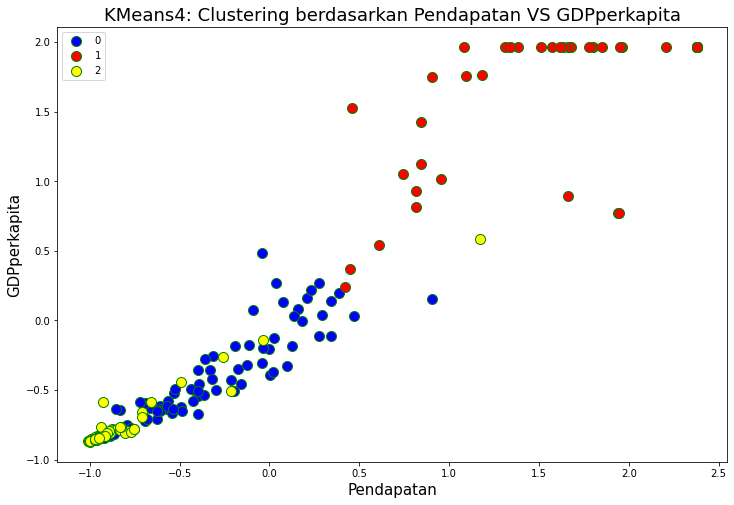

In [ ]:
kmeans4 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels4 = kmeans4.labels_
data_clustering['label4_kmeans'] = labels4

plt.figure(figsize=(12,8))
plt.scatter(data_clustering['Pendapatan'][data_clustering.label4_kmeans==0], data_clustering['GDPperkapita'][data_clustering.label4_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(data_clustering['Pendapatan'][data_clustering.label4_kmeans==1], data_clustering['GDPperkapita'][data_clustering.label4_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(data_clustering['Pendapatan'][data_clustering.label4_kmeans==2], data_clustering['GDPperkapita'][data_clustering.label4_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
#plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.title('KMeans4: Clustering berdasarkan Pendapatan VS GDPperkapita', size= 18)
plt.xlabel('Pendapatan', size= 15)
plt.ylabel('GDPperkapita', size= 15)
plt.show()


5e. Clustering berdasarkan **Jumlah Fertiliti VS Harapan Hidup**

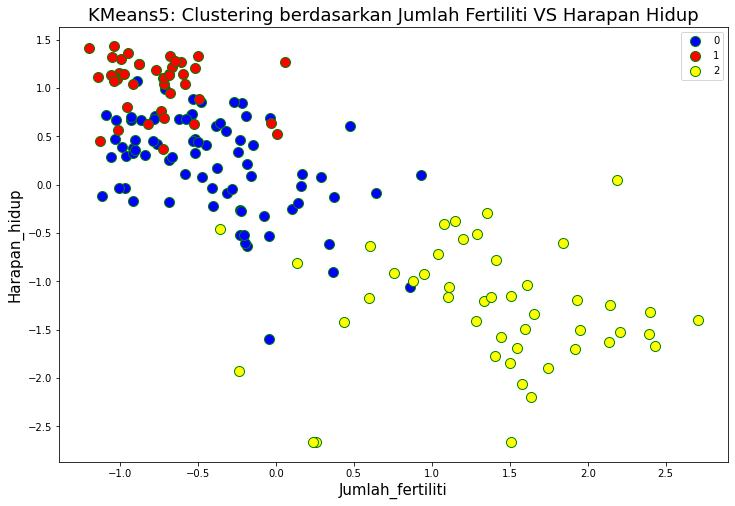

In [ ]:
kmeans5 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels5 = kmeans5.labels_
data_clustering['label5_kmeans'] = labels5

plt.figure(figsize=(12,8))
plt.scatter(data_clustering['Jumlah_fertiliti'][data_clustering.label5_kmeans==0], data_clustering['Harapan_hidup'][data_clustering.label5_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(data_clustering['Jumlah_fertiliti'][data_clustering.label5_kmeans==1], data_clustering['Harapan_hidup'][data_clustering.label5_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(data_clustering['Jumlah_fertiliti'][data_clustering.label5_kmeans==2], data_clustering['Harapan_hidup'][data_clustering.label5_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
#plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.title('KMeans5: Clustering berdasarkan Jumlah Fertiliti VS Harapan Hidup', size= 18)
plt.xlabel('Jumlah_fertiliti', size= 15)
plt.ylabel('Harapan_hidup', size= 15)
plt.show()

5f. Clustering berdasarkan **GDPperkapita VS Harapan_hidup**

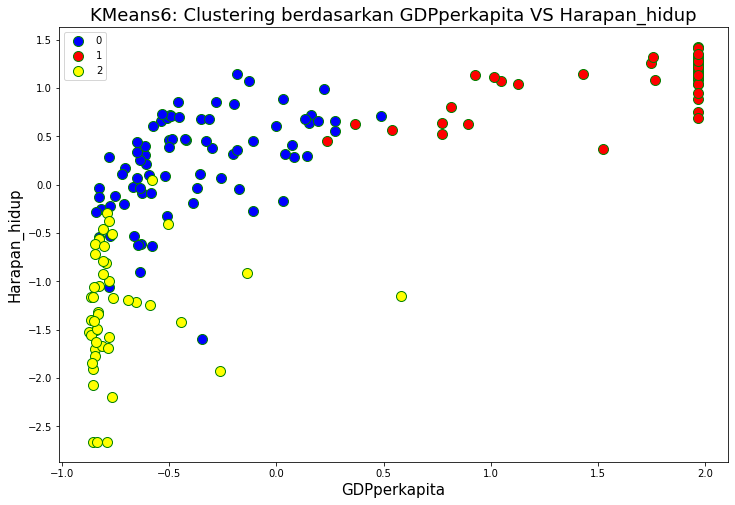

In [ ]:
kmeans6 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels6 = kmeans6.labels_
data_clustering['label6_kmeans'] = labels6

plt.figure(figsize=(12,8))
plt.scatter(data_clustering['GDPperkapita'][data_clustering.label6_kmeans==0], data_clustering['Harapan_hidup'][data_clustering.label6_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(data_clustering['GDPperkapita'][data_clustering.label6_kmeans==1], data_clustering['Harapan_hidup'][data_clustering.label6_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(data_clustering['GDPperkapita'][data_clustering.label6_kmeans==2], data_clustering['Harapan_hidup'][data_clustering.label6_kmeans==2], label='2', c='yellow', s=100, edgecolors='green')
#plt.scatter(kmeans6.cluster_centers_[:,0], kmeans6.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.title('KMeans6: Clustering berdasarkan GDPperkapita VS Harapan_hidup', size= 18)
plt.xlabel('GDPperkapita', size= 15)
plt.ylabel('Harapan_hidup', size= 15)
plt.show()


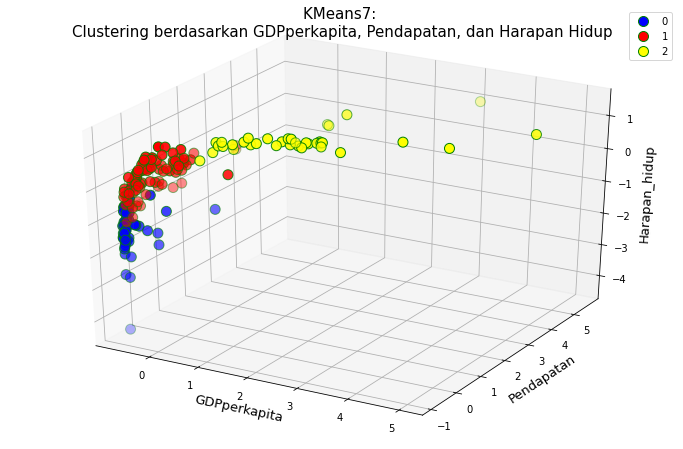

In [ ]:
sc = StandardScaler()
df_std = sc.fit_transform(data[['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']].astype(float))

kmeans7 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels7 = kmeans7.labels_

new_df = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
new_df['label7_kmeans'] = labels7

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['GDPperkapita'][new_df.label7_kmeans==0], new_df['Pendapatan'][new_df.label7_kmeans==0], new_df['Harapan_hidup'][new_df.label7_kmeans==0], label=0, c='blue', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label7_kmeans==1], new_df['Pendapatan'][new_df.label7_kmeans==1], new_df['Harapan_hidup'][new_df.label7_kmeans==1], label=1, c='red', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label7_kmeans==2], new_df['Pendapatan'][new_df.label7_kmeans==2], new_df['Harapan_hidup'][new_df.label7_kmeans==2], label=2, c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('KMeans7: \nClustering berdasarkan GDPperkapita, Pendapatan, dan Harapan Hidup', size=15)
plt.legend()
plt.xlabel('GDPperkapita', size=13)
plt.ylabel('Pendapatan', size=13)
ax.set_zlabel('Harapan_hidup', size=13)
plt.show()

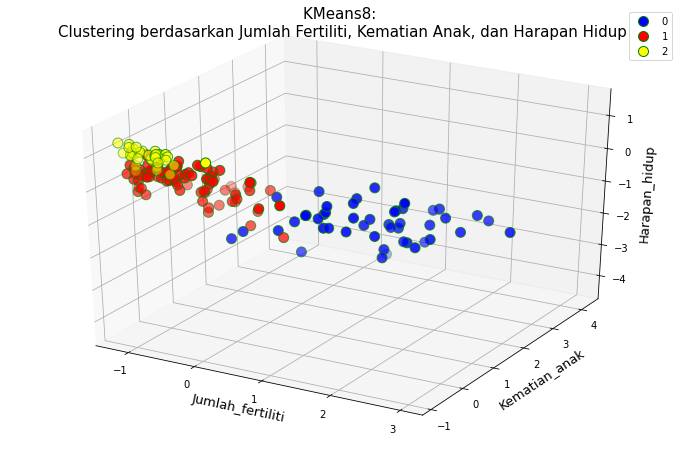

In [ ]:
kmeans8 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels8 = kmeans8.labels_


new_df['label8_kmeans'] = labels8

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['Jumlah_fertiliti'][new_df.label8_kmeans==0], new_df['Kematian_anak'][new_df.label8_kmeans==0], new_df['Harapan_hidup'][new_df.label8_kmeans==0], label=0, c='blue', s=100, edgecolors='green')
ax.scatter(new_df['Jumlah_fertiliti'][new_df.label8_kmeans==1], new_df['Kematian_anak'][new_df.label8_kmeans==1], new_df['Harapan_hidup'][new_df.label8_kmeans==1], label=1, c='red', s=100, edgecolors='green')
ax.scatter(new_df['Jumlah_fertiliti'][new_df.label8_kmeans==2], new_df['Kematian_anak'][new_df.label8_kmeans==2], new_df['Harapan_hidup'][new_df.label8_kmeans==2], label=2, c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('KMeans8: \nClustering berdasarkan Jumlah Fertiliti, Kematian Anak, dan Harapan Hidup', size=15)
plt.legend()
plt.xlabel('Jumlah_fertiliti', size=13)
plt.ylabel('Kematian_anak', size=13)
ax.set_zlabel('Harapan_hidup', size=13)
plt.show()

# **6. Report Countries**

In [ ]:
#Penyantuman Label pada DataFrame
df_hasil_label = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])

df_hasil_label['label1_kmeans'] = labels1
df_hasil_label['label2_kmeans'] = labels2
df_hasil_label['label3_kmeans'] = labels3
df_hasil_label['label4_kmeans'] = labels4
df_hasil_label['label5_kmeans'] = labels5
df_hasil_label['label6_kmeans'] = labels6
df_hasil_label['label7_kmeans'] = labels7
df_hasil_label['label8_kmeans'] = labels8

df_label = df_hasil_label[['label1_kmeans', 'label2_kmeans', 'label3_kmeans', 'label4_kmeans', 'label5_kmeans', 'label6_kmeans', 'label7_kmeans', 'label8_kmeans']]
df_label['Negara'] = data_negara
df_hasil = df_label[['Negara', 'label1_kmeans', 'label2_kmeans', 'label3_kmeans', 'label4_kmeans', 'label5_kmeans', 'label6_kmeans', 'label7_kmeans', 'label8_kmeans']]
df_hasil 

,Negara,label1_kmeans,label2_kmeans,label3_kmeans,label4_kmeans,label5_kmeans,label6_kmeans,label7_kmeans,label8_kmeans
0,Afghanistan,2,2,2,2,2,2,0,0
1,Albania,0,0,0,0,0,0,1,1
2,Algeria,0,0,0,0,0,0,1,1
3,Angola,2,2,2,2,2,2,0,0
4,Antigua and Barbuda,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0,0,0,0,0,0,1,1
163,Venezuela,0,0,0,0,0,0,1,1
164,Vietnam,0,0,0,0,0,0,1,1
165,Yemen,2,2,2,2,2,2,0,0


**Summary: 
Countries for HELP Internasional**

In [ ]:
kmeans1 = df_hasil.label1_kmeans == 2
kmeans2 = df_hasil.label2_kmeans == 2
kmeans3 = df_hasil.label3_kmeans == 2
kmeans4 = df_hasil.label4_kmeans == 2
kmeans5 = df_hasil.label5_kmeans == 2
kmeans6 = df_hasil.label6_kmeans == 2
kmeans7 = df_hasil.label7_kmeans == 0
kmeans8 = df_hasil.label8_kmeans == 0

negara_for_HELP = df_hasil[(kmeans1 & kmeans2 & kmeans3 & kmeans4 & kmeans5 & kmeans6 & kmeans7 & kmeans8)]
negara_for_HELP.reset_index()

,index,Negara,label1_kmeans,label2_kmeans,label3_kmeans,label4_kmeans,label5_kmeans,label6_kmeans,label7_kmeans,label8_kmeans
0,0,Afghanistan,2,2,2,2,2,2,0,0
1,3,Angola,2,2,2,2,2,2,0,0
2,17,Benin,2,2,2,2,2,2,0,0
3,25,Burkina Faso,2,2,2,2,2,2,0,0
4,26,Burundi,2,2,2,2,2,2,0,0
5,28,Cameroon,2,2,2,2,2,2,0,0
6,31,Central African Republic,2,2,2,2,2,2,0,0
7,32,Chad,2,2,2,2,2,2,0,0
8,36,Comoros,2,2,2,2,2,2,0,0
9,37,"Congo, Dem. Rep.",2,2,2,2,2,2,0,0


In [ ]:
negara_for_HELP.shape

(46, 9)